# Exploratory Data Analysis

This section deals with exploring, understanding, and summarizing the 'Telco Customer Churn' dataset before modeling. 

This section aims to solve the following questions:
1. What does the data look like?
2. What patterns, relationships, or trends are present?
3. Are there any errors, missing values, or outliers?
4. What might influence the target variable (Churn)?

### 1. Importing the Libraries and Dataset

#### 1.1. Loading the libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

#### 1.2.  Importing the dataset

In [2]:
dataset = pd.read_csv('/Users/eseoseodion/Documents/Portfolio/Customer Churn Prediction/data/telco_customer_churn.csv')
dataset.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### 2. Understanding the Structure of the Dataset

The following steps will be carried out in this sub-section:
1. Check the rows and columns.
2. Check the names and types of the columns.
3. Check which columns are numericals and which are categoricals.

#### 2.1. Determining the shape of the dataset

In [3]:
# Determine the shape
dataset.shape

(7043, 21)

##### Key Observation: 
Dataset has 7043 rows and 21 columns

#### 2.2. Determining the names of the columns

In [4]:
# Check column names
print("Column names:", dataset.columns)

Column names: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


##### Key Observation: 
The names of all 21 columns are: 
1. customerID
2. gender
3. SeniorCitizen
4. Partner
5. Dependents
6. tenure
7. PhoneService
8. MultipleLines
9. InternetService
10. OnlineSecurity
11. OnlineBackup
12. DeviceProtection
13. TechSupport
14. StreamingTV
15. StreamingMovies
16. Contract
17. PaperlessBilling
18. PaymentMethod
19. MonthlyCharges
20. TotalCharges
21. Churn

#### 2.3. Determining the data types of each column

In [5]:
# Check column data types
print("\nColumn data types:\n", dataset.dtypes)


Column data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


##### Key Observations:
- Most columns are 'object':

- These contain categorical data like 'Yes', 'No', 'Male', 'Female', 'DSL', 'No internet service', etc.

 - Example: gender, PaymentMethod, Contract

- SeniorCitizen is 'int64':

 - It contains values like 0 and 1 — a numeric representation of binary categories (e.g., 0 = No, 1 = Yes).

- tenure is 'int64':

 - A numeric column representing how long the customer has been with the company (e.g., number of months).

- MonthlyCharges is 'float64':

 - A true numeric column with decimal values.

- TotalCharges is 'object' but should be numeric:

 - TotalCharges should likely be a float, but it's stored as object. That means:

 - There might be some missing or bad data (e.g., empty strings or spaces).

##### Suggestions for Modelling Stage
- TotalCharges may need to be cleaned and converted.
- Columns with the dtype 'object' will need to be encoded

#### 2.4. Identifying the numerical and categorial columns

In [6]:
# Select numerical columns
numerical = dataset.select_dtypes(include=['number'])
print("Numerical columns:\n", numerical.columns)

Numerical columns:
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


##### Key Observation: There are 3 numerical columns. 

Numerical Columns (Before Transforming 'TotalCharges'):
1. SeniorCitizen
2. tenure
3. MonthlyCharges

In [7]:
# Select categorical columns
categorical = dataset.select_dtypes(include=['object'])
print("Categorical columns:\n", categorical.columns)

Categorical columns:
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


##### Key Observation: There are 18 categorical columns. 

Categorical Columns (Before Transforming Total Charges):
1. customerID
2. gender
3. Partner
4. Dependents
5. PhoneService
6. MultipleLines
7. InternetService
8. OnlineSecurity
9. OnlineBackup
10. DeviceProtection
11. TechSupport
12. StreamingTV
13. StreamingMovies
14. Contract
15. PaperlessBilling
16. PaymentMethod
17. TotalCharges
18. Churn

#### 2.5. Converting 'TotalCharges' to numeric form

NB: This is being implemented during this EDA stage for analysis purposes

In [8]:
# Convert TotalCharges to numeric, coercing errors
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

print("The data type of 'TotalCharges: ", dataset['TotalCharges'].dtypes)

The data type of 'TotalCharges:  float64


In [9]:
numerical = dataset.select_dtypes(include=['number']).columns
categorical = dataset.select_dtypes(include=['object']).columns

print("Numerical columns:\n", numerical)
print("\nCategorical columns:\n", categorical)

Numerical columns:
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

Categorical columns:
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


##### Key Observation: After transforming the 'TotalCharges' columns, there are now 4 numerical columns and 17 categorical columns.

Numerical Columns (After Transforming 'TotalCharges')
1. SeniorCitizen
2. tenure
3. MonthlyCharges
4. TotalCharges

Categorical Columns
1. customerID
2. gender
3. Partner
4. Dependents
5. PhoneService
6. MultipleLines
7. InternetService
8. OnlineSecurity
9. OnlineBackup
10. DeviceProtection
11. TechSupport
12. StreamingTV
13. StreamingMovies
14. Contract
15. PaperlessBilling
16. PaymentMethod
17. Churn

### 3. Analysing the Target Column

1. The following steps will be carried out in this sub-section:
2. Checking the distribution of Churn (Yes/No).
3. Checking if the dataset is balanced or imbalanced.

#### 3.1. Determining the unique values of the target column

In [10]:
# Determine the unique values of the target column
print(f"Unique values in 'Churn':", dataset['Churn'].unique())

Unique values in 'Churn': ['No' 'Yes']


##### Key Observations:
The unique values in the target column are:

- "No" -> The customer did not churn (they stayed with the company).
- "Yes" -> The customer did churn (they left the company).
- This confirms that the we will be dealing with only two classes (a binary classification target). The task now is to predict whether a customer will churn (Yes) or not (No).

#### 3.2. Checking if the classes are balanced

In [11]:
# Determine if the classes are balanced or unbalanced

value_count = dataset['Churn'].value_counts()

# Calculate the percentages
percentages = dataset['Churn'].value_counts(normalize=True) * 100

# Arrange data in a table 
churn_distribution_table = pd.DataFrame({
    'Label': value_count.index,
    'Count': value_count.values,
    'Percentage': percentages.values.round(1).astype(str) + '%'
})

# Display the table
print(churn_distribution_table)

  Label  Count Percentage
0    No   5174      73.5%
1   Yes   1869      26.5%


##### Interpretation of Results:
- Total customers: 7043 customers
- 5174 customers did not churn ("No") -> which is about 73.5% of that did not churn
- 1869 customers did churn ("Yes") -> which is about 26.5% of customers that did churn

##### Key Observations and Suggestions for Modelling:
- The classes are imbalanced — there are much more "No" than "Yes" responses.
- The imbalance isn't extreme, but it's something to be aware of in modeling.
- The models may favor the majority class ("No") if not handled properly.

#### 3.3. Visualising the 'Churn' column

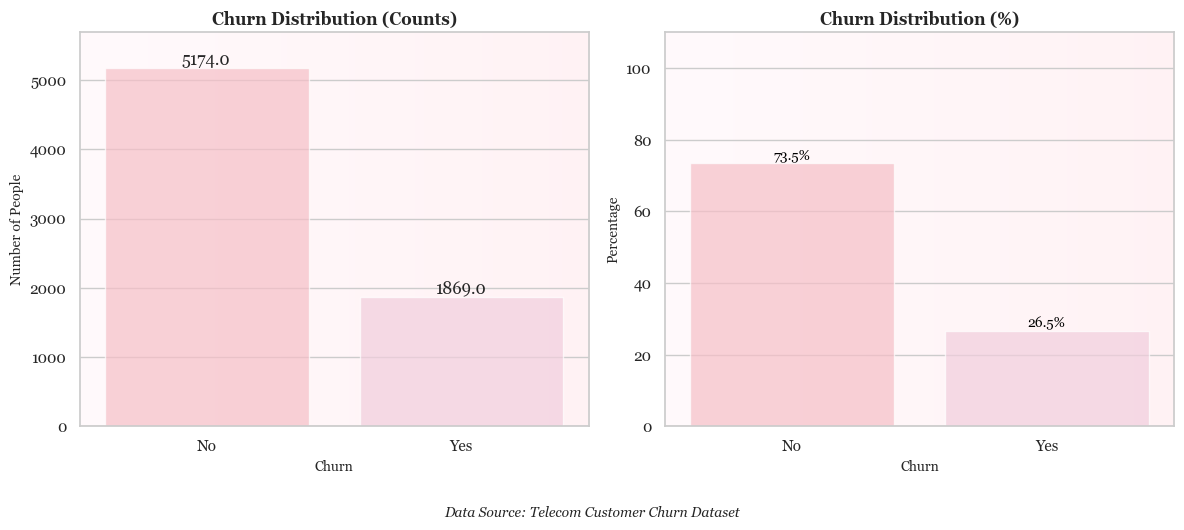

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Set theme and font
sns.set_theme(style="whitegrid", font="Georgia")

# Soft pink palette
soft_pink_palette = ['#FFB6C1', '#F8C8DC']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1. Plot counts
ax1 = axes[0]
sns.countplot(x='Churn', hue='Churn', data=dataset, palette=soft_pink_palette, alpha=0.7, ax=ax1)

# Add soft gradient background for counts plot
cmap = LinearSegmentedColormap.from_list('pink_grad', ['#FFE6F0', '#FFC0CB'])
ax1.imshow(np.linspace(0, 1, 256).reshape(1, -1), cmap=cmap, aspect='auto',
           extent=[-0.5, 1.5, 0, max(dataset['Churn'].value_counts())*1.1], alpha=0.2, zorder=0)

ax1.set_title('Churn Distribution (Counts)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Churn', fontsize=10)
ax1.set_ylabel('Number of People', fontsize=10)

# Add count labels
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 50))

# 2. Plot percentages
ax2 = axes[1]

# Calculate percentages
churn_pct = dataset['Churn'].value_counts(normalize=True) * 100
churn_df = churn_pct.reset_index()
churn_df.columns = ['Churn', 'Percentage']

sns.barplot(x='Churn', y='Percentage', hue='Churn', data=churn_df, palette=soft_pink_palette, alpha=0.7, ax=ax2)

# Add soft gradient background for percentage plot
ax2.imshow(np.linspace(0, 1, 256).reshape(1, -1), cmap=cmap, aspect='auto',
           extent=[-0.5, 1.5, 0, 110], alpha=0.2, zorder=0)

ax2.set_title('Churn Distribution (%)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Churn', fontsize=10)
ax2.set_ylabel('Percentage', fontsize=10)

# Add percentage labels
for i, row in churn_df.iterrows():
    ax2.text(i, row['Percentage'] + 1, f"{row['Percentage']:.1f}%", ha='center', fontsize=10, color='black')

# General footnote below both plots
plt.figtext(0.5, -0.05, "Data Source: Telecom Customer Churn Dataset",
            ha="center", fontsize=10, style='italic')

plt.tight_layout()
plt.show()


##### Key Observations:
- This bar chart shows the raw count of customers who churned versus those who didn’t.
- We can clearly see that the "No" class (customers who did not churn) is significantly larger than the "Yes" class. 
- This indicates an imbalance in the target variable, which is important to consider when building predictive models.
- When viewed in percentages, about 73% of customers did not churn, while only 27% did.
- This confirms the class imbalance more clearly and helps visualize the proportion of churn in the dataset.
- Representing values as percentages is especially helpful when comparing across groups or preparing for presentations.

##### Summary: Most customers did not churn, showing a clear class imbalance in the dataset. - Only 27% of customers churned, highlighting the need to address this imbalance during modeling.

##### Suggestions for Modelling and Evaluation Stages
Due to the class imbalance, the model may learn to predict the majority class most of the time and still get high accuracy, while failing to learn the minority class ("Yes") which is important for knowing the rate of churn.
1. Use stratified sampling during train-test split to preserve class proportions.
 
2. Consider using resamling techniques 
    - Oversample the minority class (i.e. SMOTE or RandomOverSampler) and undersample the majority class (i.e. RandomUnderSampler).

3. Try assigning more weights to the minority class so the model pays more attention to it.

4. During evaluation, use metrics that handle the imbalance; use precision, recall, f1-score, auc-roc, and confusion matrices. Avoid only using accuracy

5. Consider implementing ensemble methods like RandomForest or XGBoost; these perform better on imbalanced datasets.

6. Possibly use other models or algorithms that handle imbalance better (like class_weight='balanced' in logistic regression, decision trees, etc.).



### 4. Analysing the Categorical Columns

The following steps will be carried out in this sub-section:
1. Checking the unique values in each categorical column.
2. Checking for any unusual typos or mixed types.

#### 4.1. Determining the unique values of each column

In [13]:
# Determine the unique values in each column
categorical_cols = ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(dataset[col].value_counts())
    print('-' * 40)

Unique values in 'customerID':
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64
----------------------------------------
Unique values in 'gender':
gender
Male      3555
Female    3488
Name: count, dtype: int64
----------------------------------------
Unique values in 'Partner':
Partner
No     3641
Yes    3402
Name: count, dtype: int64
----------------------------------------
Unique values in 'Dependents':
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
----------------------------------------
Unique values in 'PhoneService':
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
----------------------------------------
Unique values in 'MultipleLines':
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
------------------------

##### General Observations:
**1. customerID**
 - Each customerID is unique (all counts are 1).
 - This confirms that this column is an identifier and not useful for modeling directly. We can drop this for modeling tasks.

**2. gender**
 - This column has a balanced distribution:
   - Male: 3555
   - Female: 3488
 - There is no significant gender imbalance.

**3. Partner & Dependents**
 - Partner:
   - No: 3641
   - Yes: 3402

 - Dependents:
   - No: 4933
   - Yes: 2110

 - Most customers do not have dependents and slightly more don’t have partners.

**4. PhoneService & MultipleLines**
 - PhoneService:
   - Yes: 6361
   - No: 682

 - MultipleLines includes “No phone service” -> same 682 people.
 - "No phone service" is redundant — This may be combined into a single category or encoded as 'PhoneService = No' during the data cleaning stages.

**5. InternetService**
   - Fiber optic: 3096
   - DSL: 2421
   - No: 1526
 - Over 20% (1526/7043) have no internet.
 - This will affect related columns like OnlineSecurity, StreamingTV, etc.

**6. OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies**
 - All have 3 categories: Yes, No, No internet service
 - Just like MultipleLines, “No internet service” is redundant (same 1526 across all).
 - These can be replaced these with 'No' or handled with encoding logic.

**7. Contract**
   - Month-to-month: 3875 (55%)
   - One year: 1473
   - Two year: 1695
 - Most customers are on flexible, short-term contracts, which may relate to churn risk.

**8. PaperlessBilling**
   - Yes: 4171
   - No: 2872
 - Majority prefer paperless billing — possibly younger or tech-savvy customers.

**9. PaymentMethod**
 - 4 types — relatively balanced:
 - Electronic check leads (2365)
 - Credit card least (1522)
- Might be interesting to check if Electronic check customers churn more — this happens in some churn datasets.

##### Unusual Values Found:
- MultipleLines: "No phone service" 
- Internet-related columns:	"No internet service" 
- PaymentMethod:	Long labels: 'Electronic check' 'Mailed check' 'Bank transfer (automatic)' 'Credit card (automatic)'

##### Summary for Modelling Stage:
- customerID: Needs to be drop during modelling
- gender: Will be left as it is as the dataset is balanced
- Partner and Dependents:	Might be useful for modelling - may need further analysis
- PhoneService: "No phone service" value may need cleaning across related columns
- Internet-related cols: "No internet service" may need to be standardised to "No" or may need a separate flag column
- Contract and PaymentMethod: May	be useful for churn analysis - further examination of their impact is needed
- PaperlessBilling: Binary classification, usable as-is
- MultipleLines: "No phone service" needs to be	replaced with "No"
- Internet-related columns:	"No internet service" needs to be replaced with "No" or using flag column
- PaymentMethod:	Long labels	need to be simplified for readability/encoding
- All categoricals: Extra whitespace case need to be standardized to lowercase or title case. Example: Sometimes datasets have " Yes", "yes", "YES" instead of a clean "Yes" — not immediately visible in value_counts().


_Note: The full output can be viewed in the '01_eda_object_cols_values.ipynb' file found in the 'outputs/01_eda_outputs' folder_

### 5. Analysing The Numerical Columns

The following steps will be carried out in this section:
1. Checking what the min, max, mean, median, std values are.
2. Checking if there are any unusual values


#### 5.1. Determining the min, max, mean, median and standard deviation values to see how each value tells us about the shape, center, and spread of the data 

In [14]:
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_cols:
    print(f"\nStats for {col}:")
    print("Min:", dataset[col].min())
    print("Max:", dataset[col].max())
    print("Mean:", dataset[col].mean())
    print("Median:", dataset[col].median())
    print("Std:", dataset[col].std())


Stats for SeniorCitizen:
Min: 0
Max: 1
Mean: 0.1621468124378816
Median: 0.0
Std: 0.3686116056100131

Stats for tenure:
Min: 0
Max: 72
Mean: 32.37114865824223
Median: 29.0
Std: 24.55948102309446

Stats for MonthlyCharges:
Min: 18.25
Max: 118.75
Mean: 64.76169246059918
Median: 70.35
Std: 30.090047097678493

Stats for TotalCharges:
Min: 18.8
Max: 8684.8
Mean: 2283.3004408418656
Median: 1397.475
Std: 2266.771361883145


#### Refresher on Key Terms:
| Term                         | Meaning                                              |
| ---------------------------- | ---------------------------------------------------- |
| **Min**                      | Smallest value in the data                           |
| **Max**                      | Largest value                                        |
| **Mean**                     | Average value = sum of all values ÷ count            |
| **Median**                   | Middle value when data is sorted                     |
| **Std (Standard Deviation)** | Measures how spread out the values are from the mean |


##### General Observations:
**1. SeniorCitizen**
 - Min: 0, Max: 1 → This is a binary variable (0 = not senior, 1 = senior).
 - Mean: ~0.16 → Only ~16% of customers are senior citizens.
 - Median: 0 → More than half of the customers are not seniors.
 - Std (Standard Deviation): ~0.37 -> is low (expected in binary data with skew).
- Interpretation: Majority of the customers are not senior citizens. 

**2. Tenure (Months with Company)**
 - Min: 0 (new customers), Max: 72 (6 years).
 - Mean: ~32 months, Median: ~29 months. -> Distribution is lightly right skewed (more newer customers)
 - Std: ~24.56 → High variability in customer loyalty duration.
- Interpretation:Tenure values are spread out and vary widely ascross customers.

**3. MonthlyCharges**
 - Min: $18.25, Max: $118.75 -> Wide range of monthly charges
 - Mean: $64.76, Median: $70.35 -> Distribution is slightly left-skewed (a few low-paying customers drag the average down)
 - Std: $30.09 → Large spread in what customers are charged monthly -> High variablity
- Interpretation: There are customers with low, mid, and high monthly charges -> Monthly charges are fairly spread out, with a slight tendency to have more higher values.

**4. TotalCharges**
 - Min: $18.8, Max: $8684.8 -> Cumulative cost depeds on tenure: TotalCharges = MonthlyCharges × Tenure (roughly)
 - Mean: $2283.30, Median: $1397.48 -> Distribution is strongly right-skewed 
 - Std: $2266.77 → Very wide spread, some customers are long-term and high-paying
- Interpretation: Strongly right-skewed (mean is much higher than median) -> a few high-value customers increase the average.

##### Suggestions for Later EDA
1.  Explore if senior citizens are more or less likely to churn.
2. Check if shorter tenures correlate with higher churn.
3. Useful to explore churn patterns by pricing tiers.
4. Check whether high-value or long-tenure customers are loyal.



#### 5.2. Visualising the numerical data

##### 5.2.1. Visualising the distribution (frequency) of the numerical values using a histogram

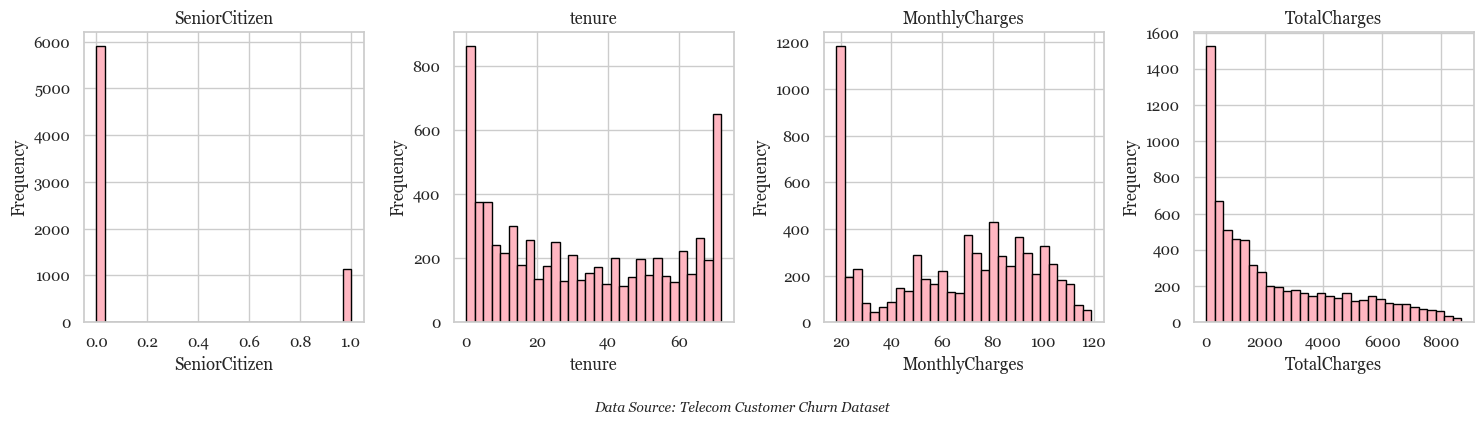

In [15]:
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Create the plot
plt.figure(figsize=(15, 4))

# Plot details, titles, labels
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    plt.hist(dataset[col], bins=30, color='lightpink', edgecolor='black')
    plt.title(f'{col}', font='Georgia')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.figtext(0.5, -0.05, "Data Source: Telecom Customer Churn Dataset",
            ha="center", fontsize=10, style='italic')

# Give it a clean finish
plt.tight_layout()
plt.show()


##### General Observations:
**1. SeniorCitizen Plot**
- The histogram confirms most customers are not senior citizens.
- Very imbalanced feature.

**2. tenure Plot**
- Distribution is U-shaped.
- High frequency of customers at the start and end of the tenure range.
- Suggests short-term and long-term customers are more common than mid-term.

**3. MonthlyCharges Plot**
- Shows a multimodal or skewed distribution.
- One big spike at the low end (likely basic plans), others distributed broadly.
- Suggests customers are either on minimal or premium plans.

**4. TotalCharges Plot**
- Histogram has an unusual shape; it's truncated or shaded oddly (gray at the top).
- Bottom axis is cluttered -> Might be a formatting issue or a datatype problem in your data (e.g. string mixed with numbers).
- Frequency is high at lower TotalCharges, tapers off gradually.
- Right-skewed distribution.


##### Consistency Between Stats and Plots
- SeniorCitizen: Consistent – both stats and plot show imbalance (most are non-seniors).
- Tenure: Consistent – stats show a wide spread, plot confirms U-shape.
- MonthlyCharges: Mostly consistent – stats indicate high variability, and plot shows wide spread and skew.
- TotalCharges: Has some inconsistencies:
 - Plot appearance is off (cluttered X-axis, gray area).
 - Stats imply right skew with high max/mean, but the plot doesn’t clearly represent that.
 - This hints at a possible data quality issue (e.g., TotalCharges may have string entries or nulls).

 ##### Problems to Address During the Modelling Stage
1. Problem 1: Class Imbalance in SeniorCitizen
 - Issue: Binary feature heavily skewed (majority are non-seniors).
 - Fix:
    - Try using stratified sampling during train-test split.
    - Consider using SMOTE or class weights if this imbalance impacts churn prediction.

2. Problem 2: TotalCharges Axis/Distribution Issue
 - Issue: Plotting error and possibly invalid data entries.
 - Fix:
    - Remember to convert TotalCharges to numeric with pd.to_numeric(errors='coerce').
    - Remember to handle NaNs (remove or impute based on tenure × MonthlyCharges).
    - Verify datatype: df['TotalCharges'].dtype.

3. Problem 3: High Skew in Features (e.g. TotalCharges, MonthlyCharges)
 - Issue: Right skew in both features. Could affect models sensitive to distribution (e.g., linear regression).
 - Fix:
    - Try applying log transformation or box-cox transformation to normalize.
    - Implement robust scaling (not min-max) due to outliers.

4. Problem 4: Multimodal Distributions
 - Issue: MonthlyCharges showing multiple peaks.
 - Fix:
    - May indicate subgroups (e.g., multiple service types) -> try creating clusters or use domain knowledge to bin into categories (e.g., low/mid/high plan).

5. **Not an urgent problem: Feature engineering**
- For improved modelling, try binning tenure into categories e.g. (low/med/high)

##### 5.2.2. Visualising the distributions across categories and detecting outliers using a boxplot

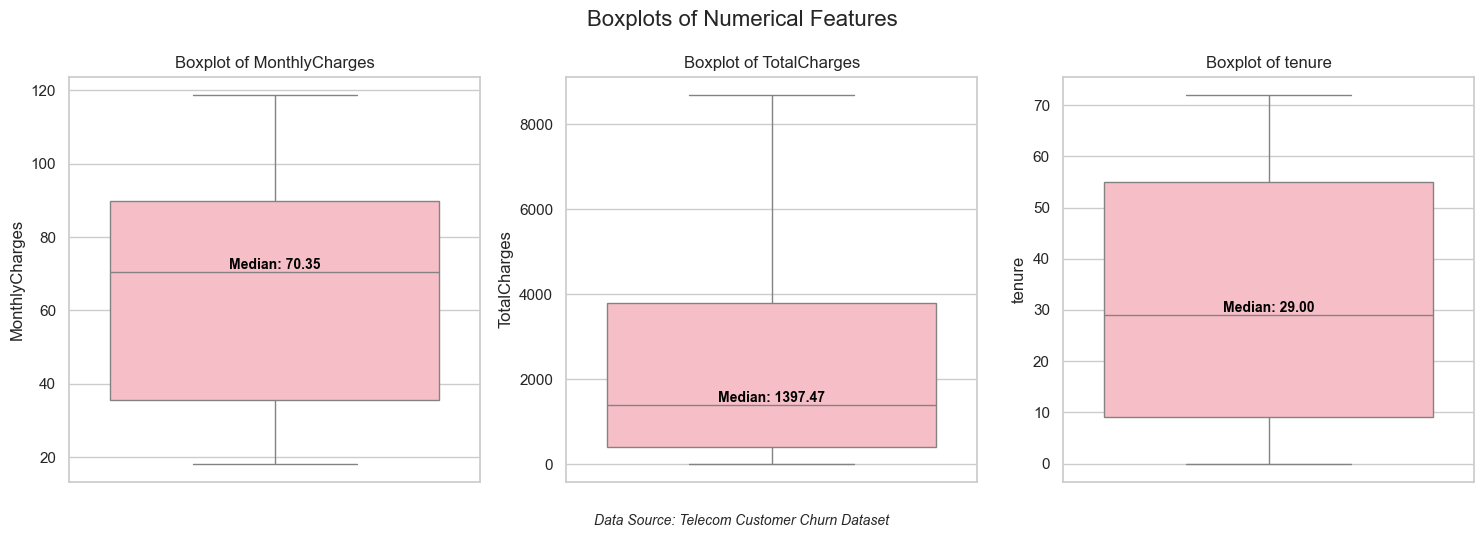

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['MonthlyCharges', 'TotalCharges', 'tenure']
df = dataset[num_cols]  # keep missing values for EDA

fig, axes = plt.subplots(1, 3, figsize=(15, 5))


for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='lightpink')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(f'{col}')

    # Calculate median
    median_val = df[col].median()
    
    # Annotate median on the plot
    axes[i].text(0, median_val, f'Median: {median_val:.2f}', 
                 horizontalalignment='center', 
                 verticalalignment='bottom',
                 fontsize=10, color='black', fontweight='bold')

plt.suptitle('Boxplots of Numerical Features', fontsize=16)
plt.figtext(0.5, -0.05, "Data Source: Telecom Customer Churn Dataset",
            ha="center", fontsize=10, style='italic')
plt.tight_layout()
plt.show()


##### General Observations
**1. MonthlyCharges**

- The boxplot shows that most customers are charged between $35 and $90 per month.
- The median value is $70.35, indicating many customers are in mid-range pricing plans.
- Distribution is fairly symmetric, with few or no visible outliers.
- Implication: Feature is well-behaved and ready for modeling with minimal transformation.

**2. TotalCharges**

- This feature has a wide spread, ranging from near $0 to over $8500.
- The median is $1397.47, but the upper whisker extends far, indicating a strong right-skew.
- Likely contains outliers or customers with long tenure and high monthly charges.
- Implication: This feature is skewed and may require log transformation to reduce its influence.

**3. Tenure**

- The median tenure is 29 months, with values ranging from 0 to 72 months (6 years).
- The distribution is somewhat positively skewed, showing more customers have shorter tenure.
- No significant outliers are present.
- Implication: Useful feature; may benefit from binning or scaling.

##### Underlying Issues Detected
- TotalCharges has a Right-skewed distribution. This could affect model performance; extreme values dominate.
- TotalCharges, MonthlyCharges, tenure have different scales. This can mislead distance-based models (e.g. KNN, SVM).
- TotalCharges might have some possible outliers. May distort mean and affect regression/classification.
- 'Zero tenure' found in tenure. Suggests new customers – these values need to be investigated to ascertain if they are valid or due to a data entry error


#### Suggestions for Modelling Stage
**1. Data Cleaning**

- Investigate and handle zero tenure or zero total charges cases.
- Verify if TotalCharges == 0 for customers with tenure > 0 — this could be a data error.

**2. Feature Scaling**

- Apply MinMaxScaler or StandardScaler on MonthlyCharges, TotalCharges, and tenure to ensure equal treatment in models.

**3. Transformation**

- Apply log transformation to TotalCharges to reduce skew:

**4. Binning (Optional)**

- Consider and look into 'binning' for tenure to divide it into categories (e.g., ‘New’, ‘Medium-term’, ‘Loyal’) to explore patterns in churn.

**5. Outlier Handling**

- Consider capping extreme values of TotalCharges or using RobustScaler if outliers are meaningful.

## WRITE NOTES

### 6. Checking for/Handling Missing Data

The following step will be carried out in this section:
1. Checking which columns have missing data and how many. 

#### 6.1. Checking if any columns have any missing rows

In [17]:
# Check for missing values
print(dataset.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


##### General Observations:
- All columns except TotalCharges have 0 missing values, meaning every record has valid data in those columns.
- The column TotalCharges has 11 missing values (null or NaN).
- Since TotalCharges is a numerical column representing the total amount charged to customers, these missing values may correspond to customers who are new or have incomplete billing data.
- Missing values need to be addressed before using TotalCharges for modeling or analysis to avoid errors or bias.

##### 6.1.1  Exploring the rows with missing 'TotalCharges' to understand their context better

In [18]:
dataset[dataset['TotalCharges'].isnull()]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


##### Key Observations:
- The 11 rows in 'TotalCharges' have missing or undefined values in the dataset.
- In the TotalCharges column, NaN means that for those 11 rows, the total amount charged to the customer is not recorded or unavailable.
- This often happens if the customer is new and hasn’t been billed yet, or if there was an issue in recording their billing data.
- Since TotalCharges depends on how long the customer has been active and their monthly charges, these missing values might correspond to customers with zero or very low tenure (meaning very recently joined customers).

##### 6.1,2, Checking to see if those 11 customers have low tenure:

In [19]:
dataset[dataset['TotalCharges'].isnull()][['tenure', 'MonthlyCharges', 'TotalCharges']]


,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


##### Key Observations:
- All customers with missing TotalCharges have a tenure of 0, meaning they are brand new customers who haven't stayed for any full billing cycle yet.
- Since TotalCharges represents the total amount billed so far, it makes sense that for these new customers, the total charge is not yet available — hence, it is recorded as NaN.
- Their MonthlyCharges values are present because this is the expected monthly cost, but no billing has occurred yet due to zero tenure.


#### Sugesstions for Modelling Stage - Handling Missing Data in TotalCharges
1. Consider dropping the rows with missing TotalCharges.
Reasons: 
 - There are only 11 missing rows out of thousands, so dropping them will likely not affect the analysis significantly.
 - These rows correspond to customers with tenure = 0, meaning they haven’t really started their subscription or billing cycle yet.
 - Keeping them might skew results if analysis focuses on total charges or tenure-related patterns.

or

2. Imputing (filling) the missing values -> Although this might be less ideal because:
Reasons:
- Since TotalCharges depends on MonthlyCharges and tenure, and tenure is zero here, the expected TotalCharges should logically be zero.
- Consider imputing zero, but in the long run, it might be simpler and cleaner just to drop these few rows.

### 7. Looking for Relationships

The following seteps will be carried out in this sub-section:
1. Are certain features correlated?
2. Do certain patterns occur with churn?
3. These will be achieved using the following tools: pairplots, grouped bar charts, heatmaps, scatterplots

##### 7.1. Determining which features might be relevant for modelling using grouped bar charts.

Objectives:
- Determine if certain categories have more churners?
- Find out if there are proportions different across groups?
- Look for clear differences or unexpected similarities.

In [21]:
for col in dataset.select_dtypes(include='object').columns:
    print(f"{col}: {dataset[col].nunique()} unique values")
    print(dataset[col].value_counts())
    print('---')


customerID: 7043 unique values
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64
---
gender: 2 unique values
gender
Male      3555
Female    3488
Name: count, dtype: int64
---
Partner: 2 unique values
Partner
No     3641
Yes    3402
Name: count, dtype: int64
---
Dependents: 2 unique values
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
---
PhoneService: 2 unique values
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
---
MultipleLines: 3 unique values
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
---
InternetService: 3 unique values
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
---
OnlineSecurity: 3 unique values
OnlineSecurity
No                     3498
Yes   

##### 7.1.1.  Looking for correlation or association with churn

In [22]:
for col in categorical_cols[1:]:
    print(f"Churn distribution by {col}:")
    ct = pd.crosstab(dataset[col], dataset['Churn'], normalize='index') * 100
    print(ct.round(2))
    print("-" * 40)


Churn distribution by gender:
Churn      No    Yes
gender              
Female  73.08  26.92
Male    73.84  26.16
----------------------------------------
Churn distribution by Partner:
Churn       No    Yes
Partner              
No       67.04  32.96
Yes      80.34  19.66
----------------------------------------
Churn distribution by Dependents:
Churn          No    Yes
Dependents              
No          68.72  31.28
Yes         84.55  15.45
----------------------------------------
Churn distribution by PhoneService:
Churn            No    Yes
PhoneService              
No            75.07  24.93
Yes           73.29  26.71
----------------------------------------
Churn distribution by MultipleLines:
Churn                No    Yes
MultipleLines                 
No                74.96  25.04
No phone service  75.07  24.93
Yes               71.39  28.61
----------------------------------------
Churn distribution by InternetService:
Churn               No    Yes
InternetService        

##### Churn Observations by Categorical Feature
**1. gender**
   - The churn rates for Female (26.92%) and Male (26.16%) are almost the same.
   - This suggests gender may not have a strong influence on churn.

**2. Partner**
   - Customers without partners have a higher churn rate (32.96%) compared to those with partners (19.66%).
   - This implies that having a partner may reduce the likelihood of churn, possibly due to shared decision-making or stability.

**3. Dependents**
   - Customers without dependents have a higher churn rate (31.28%) than those with dependents (15.45%).
   - This suggests customers with dependents may be more stable or committed.

**4. PhoneService**
   - The churn rates for customers with and without phone service are quite similar (24.93% vs 26.71%).
   - Phone service may not significantly impact churn.

**5. MultipleLines**
   - Customers with multiple lines have a slightly higher churn rate (28.61%) than those without (25.04%).
   - This feature might have some relationship with churn but not a strong one.

**6. InternetService**
   - Customers with Fiber optic service have a high churn rate (41.89%), compared to DSL (18.96%) and No internet (7.40%).
   - This indicates that InternetService type affects churn significantly — fiber users are more likely to churn.

**7. OnlineSecurity**
   - Customers without online security have a high churn rate (41.77%) compared to those with the service (14.61%).
   - Online security may be a strong retention factor.

**8. OnlineBackup**
   - Customers without online backup have a churn rate of 39.93%, versus 21.53% for those with it.
   - This suggests backup services may help reduce churn.

**9. DeviceProtection**
   - Churn is higher for customers without device protection (39.13%) compared to those with it (22.50%).
   - Device protection appears to have a negative correlation with churn.There is a stong association

**10. TechSupport**

   - Customers without tech support have a churn rate of 41.64%, compared to 15.17% for those with it.
   - Tech support may significantly reduce churn.

**11. StreamingTV**

   - Customers not using StreamingTV have a churn rate of 33.52%, slightly higher than those who do (30.07%).
   - StreamingTV might contribute to customer engagement, but the impact is moderate.

**12. StreamingMovies**

   - Similar to StreamingTV, churn is slightly higher for non-users (33.68%) vs users (29.94%).
   - StreamingMovies has a mild effect on churn.

**13. Contract**

   - Month-to-month contracts have a much higher churn rate (42.71%) compared to one year (11.27%) and two year (2.83%).
   - This suggests contract type strongly relates to churn — month-to-month customers are more likely to leave.

**14. PaperlessBilling**

   - Customers with paperless billing churn more (33.57%) than those without it (16.33%).
   - Paperless billing may correlate with a demographic that is more prone to churn.

**15. PaymentMethod**

   - Churn is highest among Electronic Check users (45.29%) and lowest for automatic payment users like Credit Card (15.24%).
   - Payment method choice is a strong churn indicator — automatic payments may help retain customers.

##### Suggestions for Modelling and Evaluation Stages
**- gender**
- Since churn rates for Male (26.16%) and Female (26.92%) are very similar, gender may not be a strong predictor.
- May still include it initially, but watch for low feature importance.

**- Partner & Dependents**
- Both show clear differences in churn rates (e.g., Partner = No → 32.96% churn vs Yes → 19.66%).
- May capture customer stability or family context — worth including in the model.

**- Contract Type**
- Very strong indicator:
    - Month-to-month → 42.71% churn
    - One-year → 11.27%
    - Two-year → 2.83%
- Important categorical feature — should definitely be included.

**- InternetService & Related Features**
- InternetService type shows strong churn differences:
    - Fiber optic → 41.89%
    - DSL → 18.96%
    - No internet → 7.40%
- Sub-features (e.g., OnlineSecurity, OnlineBackup, TechSupport) also show strong patterns.
- Note: Be cautious of multicollinearity — use one-hot encoding and later test feature importance or drop highly redundant ones.

**- DeviceProtection**
- Strong negative association with churn:
    - No protection → 39.13% churn
    - Yes → 22.50%
- Indicates customers with protection are less likely to leave.
- Worth including as a predictor.

**- PaperlessBilling & PaymentMethod**
- Electronic check users have highest churn (45.29%) — may reflect less committed customers.
- PaperlessBilling = Yes also has higher churn (33.57%) vs No (16.33%) — useful categorical indicators.
- Include both features — may carry behavioral signals.

**- Multicollinearity Check**
- Several services are nested within InternetService — consider checking correlations or using techniques like PCA, VIF, or feature importance after training to reduce redundancy.
- Use .feature_importances_ (tree models) or coefficients (logistic regression) to see which features actually help most.
- Drop low-importance features if they don’t improve performance.

_Note: The full output can be viewed in the '01_eda_churn_distribution_by_category.ipynb' file found in the 'outputs/01_eda_outputs' folder_

##### 7.1.2. Visualising counts/proportions between categorical groups using bar charts

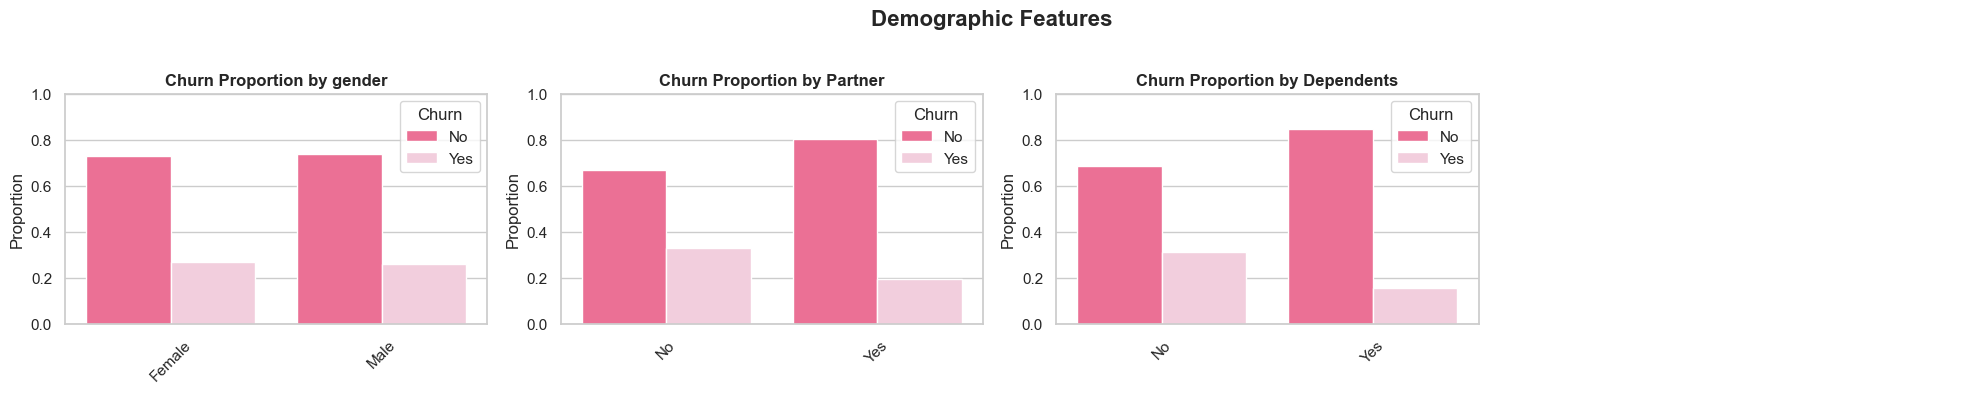

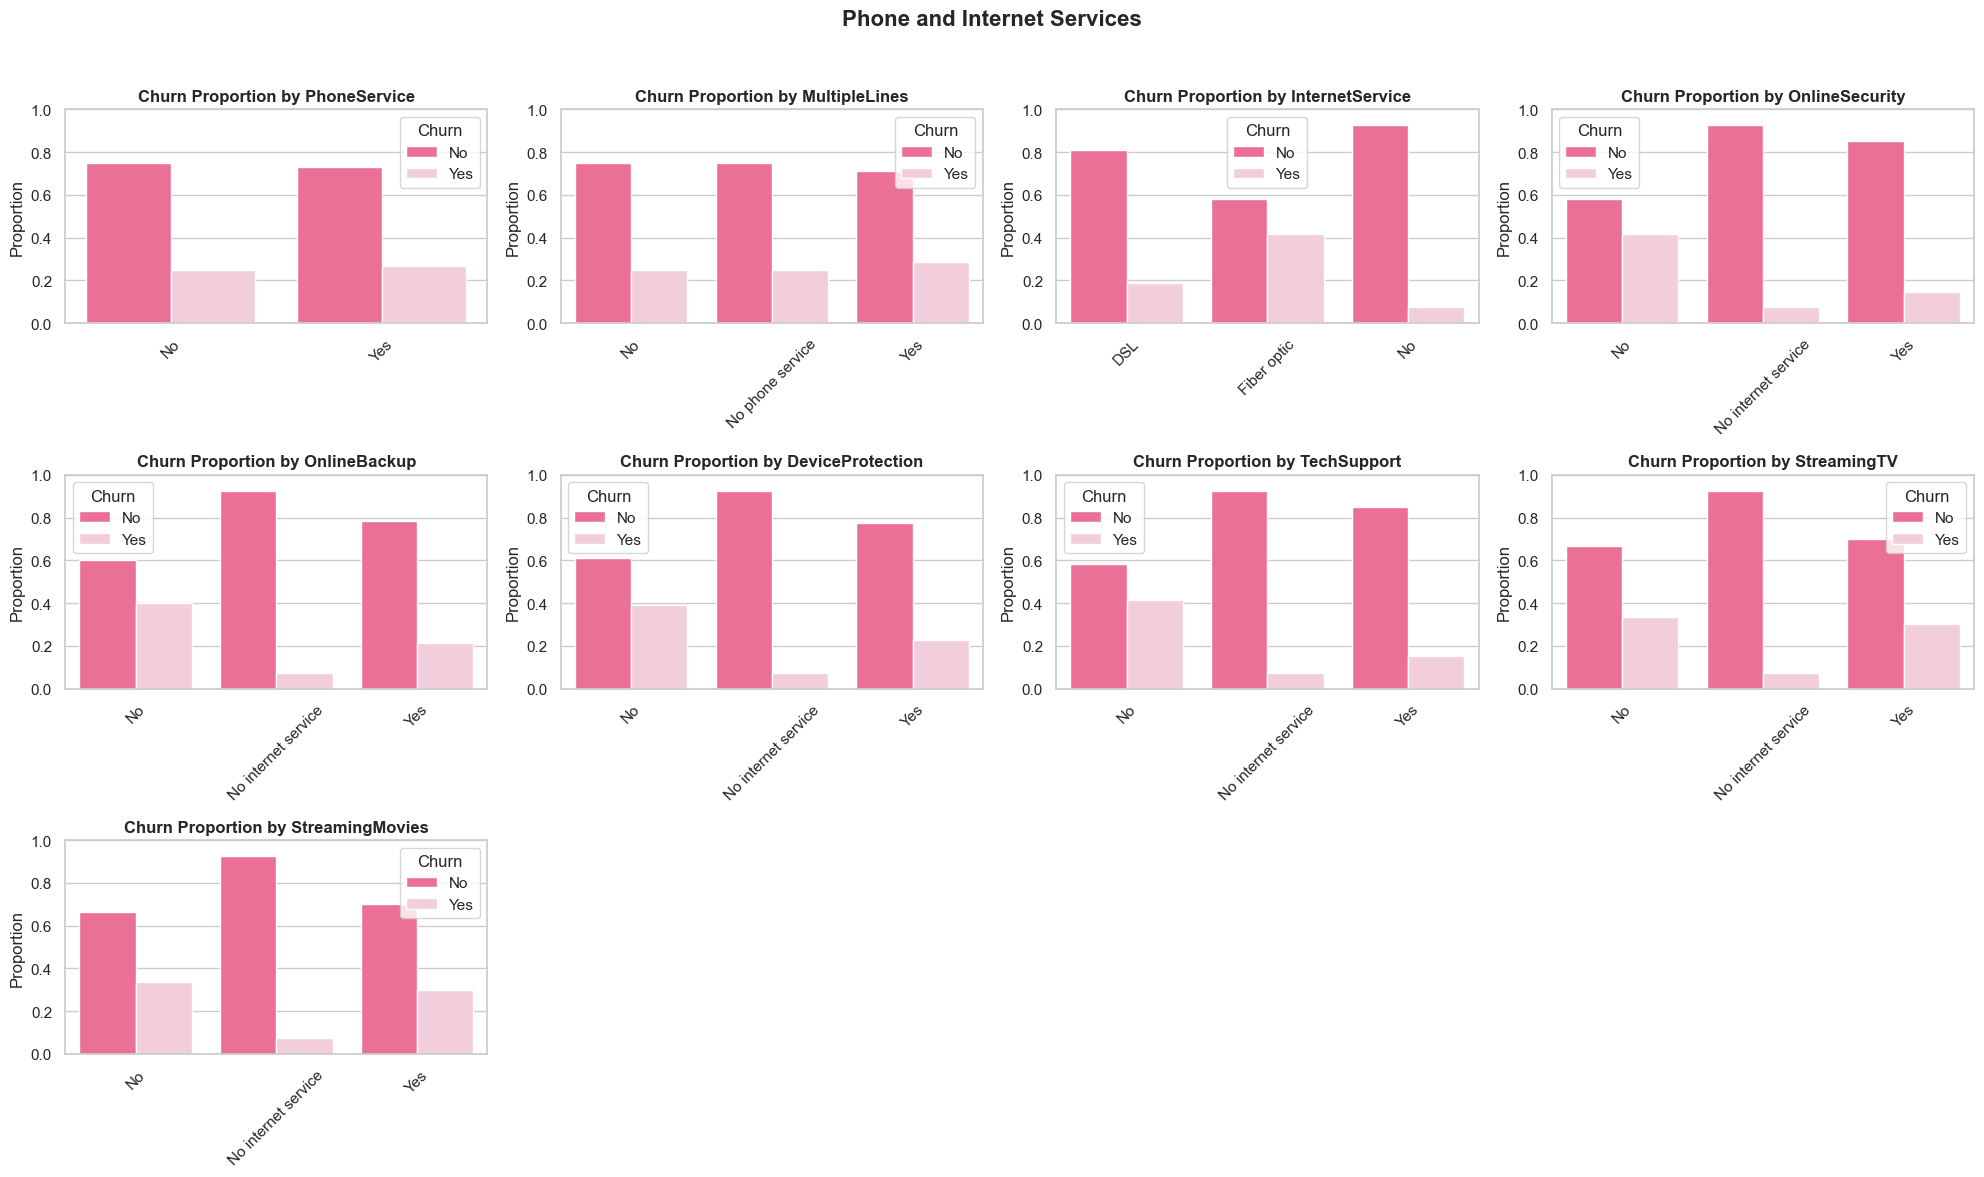

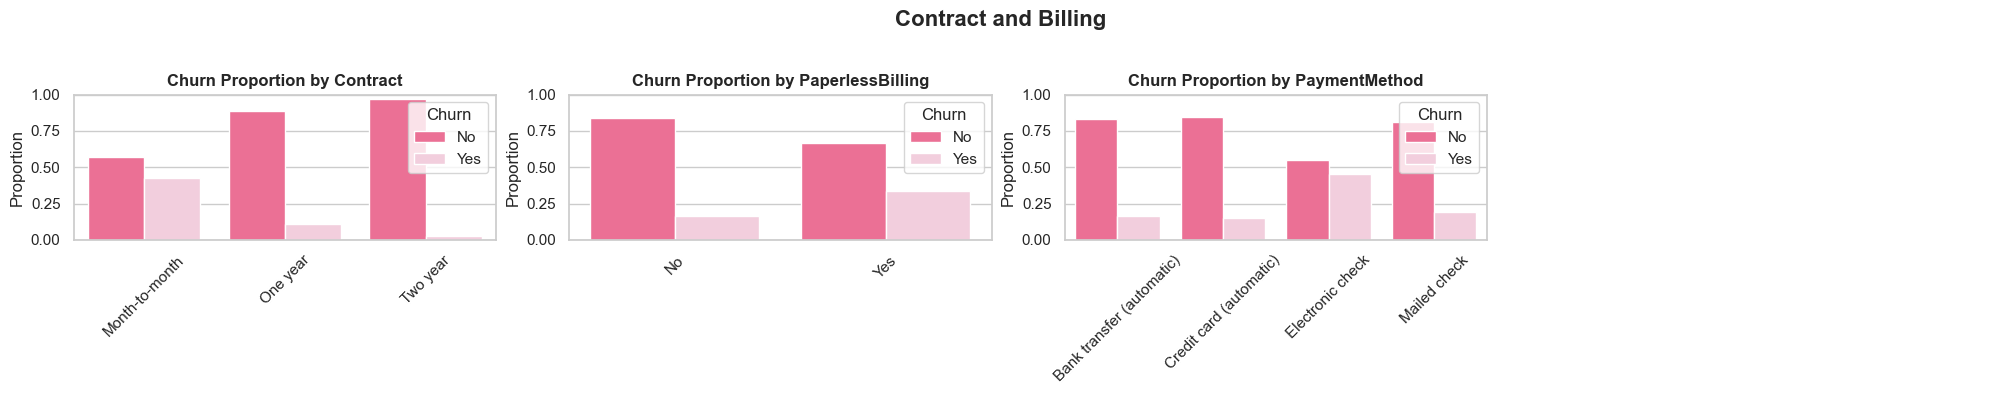

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Custom palette
palette = ['#FF5C8D', '#F8C8DC']
sns.set(style="whitegrid")

# Feature groups
feature_groups = {
    "Demographic Features": ['gender', 'Partner', 'Dependents'],
    "Phone and Internet Services": ['PhoneService', 'MultipleLines', 'InternetService',
                                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                    'TechSupport', 'StreamingTV', 'StreamingMovies'],
    "Contract and Billing": ['Contract', 'PaperlessBilling', 'PaymentMethod'],
}

for group_name, features in feature_groups.items():
    cols = 4
    rows = (len(features) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        # Calculate normalized proportions using .unstack()
        proportions = (
            dataset.groupby([feature, 'Churn']).size()
            .unstack(fill_value=0)
        )
        proportions = proportions.div(proportions.sum(axis=1), axis=0).reset_index()
        
        # Melt to long format for seaborn
        melted = proportions.melt(id_vars=feature, value_vars=['No', 'Yes'], 
                                  var_name='Churn', value_name='Proportion')
        
        # Plot
        sns.barplot(
            x=feature,
            y='Proportion',
            hue='Churn',
            data=melted,
            palette=palette,
            ax=axes[i]
        )
        axes[i].set_title(f'Churn Proportion by {feature}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Proportion')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_ylim(0, 1)

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.suptitle(f'{group_name}', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


**Note: For better storytelling, related features were grouped together**

**1. gender:** Consistent with stats.
- Shows similar churn rates across male and female.
- Interpretation: Gender may not be a significant predictor of churn.

**2. Partner / Dependents:** Consistent with stats.
- Higher churn rates for customers without partners/dependents.
- Interpretation: Customers without family ties may churn more.

**3. PhoneService / MultipleLines:** Consistent with stats
- Slightly higher churn rates for customers with multiple lines and similar churn for those with or without phone service.
- Interpretation: Customers managing multiple lines may face more complexity or costs, contributing to churn. However, simply having phone service does not appear to be a strong indicator on its own.

**4. InternetService and Related Features i.e. OnlineSecurity, TechSupport, e.t.c:** Consistent with stats
- Expect higher churn for users with fibre optic service, or those without online security or tech support and other internet related features.
- Interpretation: Lack of value-added services correlates with higher churn.

**5. Contract:** Consistent with stats
- Very predictive. Month-to-month contracts often have higher churn.
- Interpretation: Short contracts lead to higher volatility.

**6. PaperlessBilling:** Consistent with stats
- Higher churn rates among customers using paperless billing compared to those receiving physical bills.
- Interpretation: Paperless billing users may be more tech-savvy, budget-conscious, or sensitive to digital experiences, making them more likely to churn.
Suggestions:
This is a potentially strong churn predictor. Keep and encode it (e.g., one-hot).

**7. PaymentMethod:** Consistent with stats
- Certain methods like Electronic Check often correlate with higher churn.
- Interpretation: Possibly linked to low financial commitment or auto-renewal setup.


**Suggestions for Modelling Stage:** 
1. gender: Low predictive power. May be dropped or one-hot encoded depending on context.
2. Partner/Dependent: These could be good predictors. Include as-is (one-hot encoded).
3. MultipleLines: Keep — may provide weak but helpful signal.
4. PhoneService: Retain for now, but monitor feature importance during modelling. Consider dropping if not useful.
5. InternetService, OnlineSecurity, TechSupport: Consider feature engineering like “has_support = OnlineSecurity OR TechSupport”.
6. InternetService, OnlineSecurity, TechSupport: Potential interaction terms in advanced models.
7. Contract: Important categorical feature. Encode properly (ordinal encoding may help for Contract).
8. PaperlessBilling: This is a potentially strong churn predictor. Keep and encode it (e.g., one-hot).
9. PaymentMethod: Strong candidate feature. Watch for sparse categories during encoding.

#### 7.1.3. Visualising correlations with heatmaps

Objectives:
1. Find out which numerical features have strong positive or negative correlations.
2. Check if any features highly correlate with churn (if churn is numeric).
3. Check if there are clusters of related features.

##### 7.1.3.1. Encoding 'Churn' before including in heatmap

In [24]:
dataset['Churn_Encoded'] = dataset['Churn'].map({'No': 0, 'Yes': 1})

##### 7.1.3.2. Plotting the heatmap to visualise how strongly correlated the features are with 'Churn'

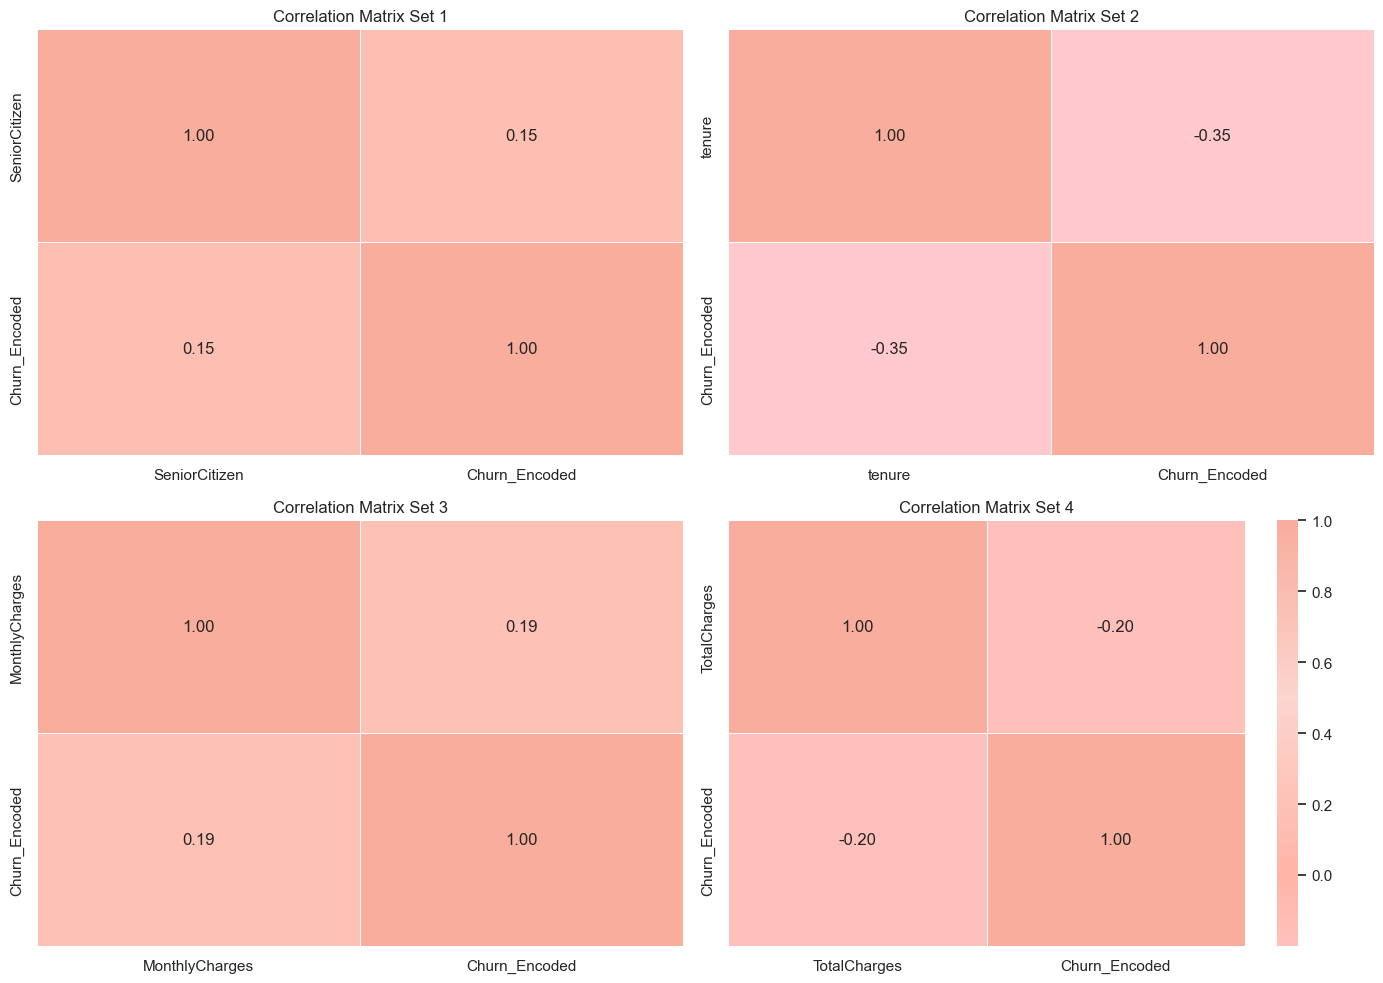

In [38]:
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Define pink gradient (hex or named colors)
colours = ["#FFF0F3", "#FFD1DC", "#FFB5A7", "#FCD5CE", "#F8AD9D"]
cmap = LinearSegmentedColormap.from_list("soft_pink_orange", colours)

# Split numerical features into 4 roughly equal parts
split_features = np.array_split(numerical_cols, 4)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns layout

for i, ax in enumerate(axes.flat):
    subset = split_features[i]
    # Calculate correlation matrix for the subset plus Churn_Encoded
    corr_matrix = dataset[subset.tolist() + ['Churn_Encoded']].corr()
    
    # Plot heatmap on the respective subplot axis
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, center=0,
                linewidths=0.5, cbar=(i==3), ax=ax)  # Only last plot has colorbar
    
    ax.set_title(f'Correlation Matrix Set {i+1}', fontsize=12)

plt.tight_layout()
plt.show()

##### General Observations:
- Notes on Reading Heatmaps
1. Focus on the color scale (legend or cmap)
    - Dark colour/intense colors: Strong relationship.
    - Light or faded colors: Weak or no relationship.
    - Positive correlation (e.g. +0.8): As one feature increases, the other tends to increase.
    - Negative correlation (e.g. -0.6): As one feature increases, the other tends to decrease.

2. Diagonal values
    - The diagonal from top-left to bottom-right is always 1.00, because every feature is perfectly correlated with itself. You can ignore this.

3. Off-diagonal values
    - These are where the insights lie.
    - High positive (e.g. 0.7 to 1.0) → strong direct relationship.
    - High negative (e.g. -0.7 to -1.0) → strong inverse relationship.
    - Around 0 (e.g. -0.1 to 0.1) → weak or no linear relationship.

4. Look for strong correlations with target (e.g. Churn)
    - Find the row or column for "Churn" (if it's numerical or encoded like 0 and 1).
    - See which features have:
        - Strong positive correlation → associated with more churn.
        - Strong negative correlation → associated with less churn.

##### Interpretations Based on Plots
- **SeniorCitizen vs. Churn: +0.15**
    - Positive correlation means that being a senior citizen is somewhat associated with a higher chance of churn.
    - The value 0.15 is a weak positive correlation, so the relationship exists but is not very strong.

- **tenure vs. Churn: -0.35**
    - Negative correlation means that the longer a customer has stayed (higher tenure), the less likely they are to churn.
    - The value -0.35 shows a moderate negative relationship, so tenure is a fairly important factor in reducing churn risk.

- **MonthlyCharges vs. Churn: +0.19**
    - Positive correlation means customers with higher monthly charges are slightly more likely to churn.
    - The value 0.19 is a weak positive correlation, so it might be a factor but not a very strong one.

- **TotalCharges vs. Churn: -0.20**

    - Negative correlation means that customers who have accumulated more total charges over time tend to churn less.
    - The value -0.20 indicates a weak to moderate negative correlation, suggesting longer, more paying customers tend to stay.


##### Summary
- SeniorCitizen has a weak positive correlation with churn — senior citizens slightly more likely to leave.

- Tenure has a moderate negative correlation — longer-tenured customers are less likely to churn.

- MonthlyCharges shows a weak positive correlation — higher monthly charges may increase churn risk a little.

- TotalCharges has a weak to moderate negative correlation — customers with higher total charges tend to stay longer.



##### 7.1.3.3. Plotting the heatmap to visualise how strongly correlated the features are with one another

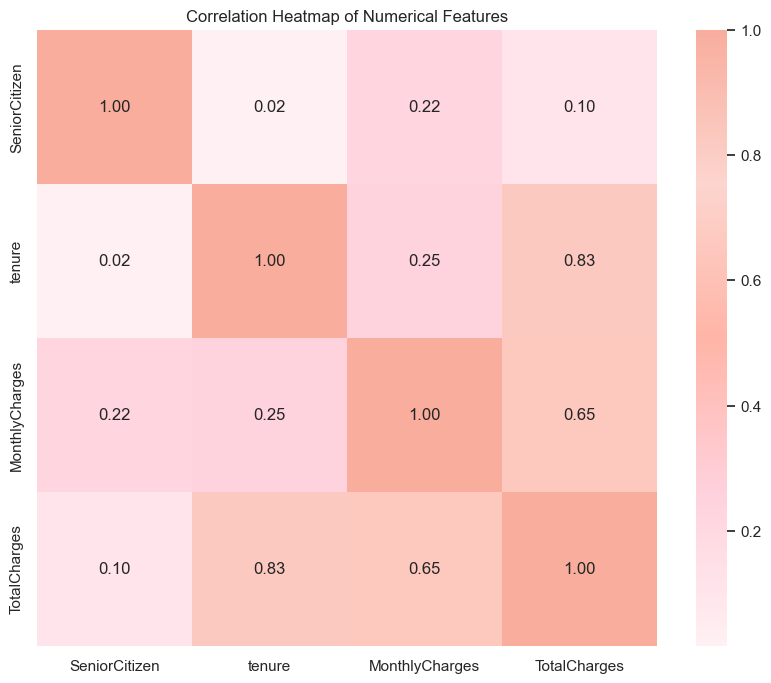

In [39]:
# Define gradient (hex or named colors)
colours = ["#FFF0F3", "#FFD1DC", "#FFB5A7", "#FCD5CE", "#F8AD9D"]
cmap = LinearSegmentedColormap.from_list("soft_pink_orange", colours)

plt.figure(figsize=(10,8))
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap=cmap, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


##### Suggestions for Modelling Stage
1. Keep all four features as they show correlations with churn and provide predictive value.

2. Use SeniorCitizen as a binary numerical feature directly.

3. Use tenure, MonthlyCharges, and TotalCharges as continuous numerical features and consider scaling them for certain models.

4. Check for missing values and handle appropriately.

5. Consider checking multicollinearity due to high correlation among numerical features, especially TotalCharges.

6. Potentially try feature engineering such as binning tenure for improved modeling.

#### 7.2. Visualising correlations between features using scatterplots

Objectives:
1. Spot possible relationships, outliers, or clusters.
2. Find out if churners and non-churners separate into different regions?
3. Confirm if there are anny clear patterns, such as high monthly charges leading to more churn

These will be achieved using the results correlation heatmap first to find pairs that are highly positively or negatively correlated (e.g., > 0.5 or < -0.5) to plot against one another.

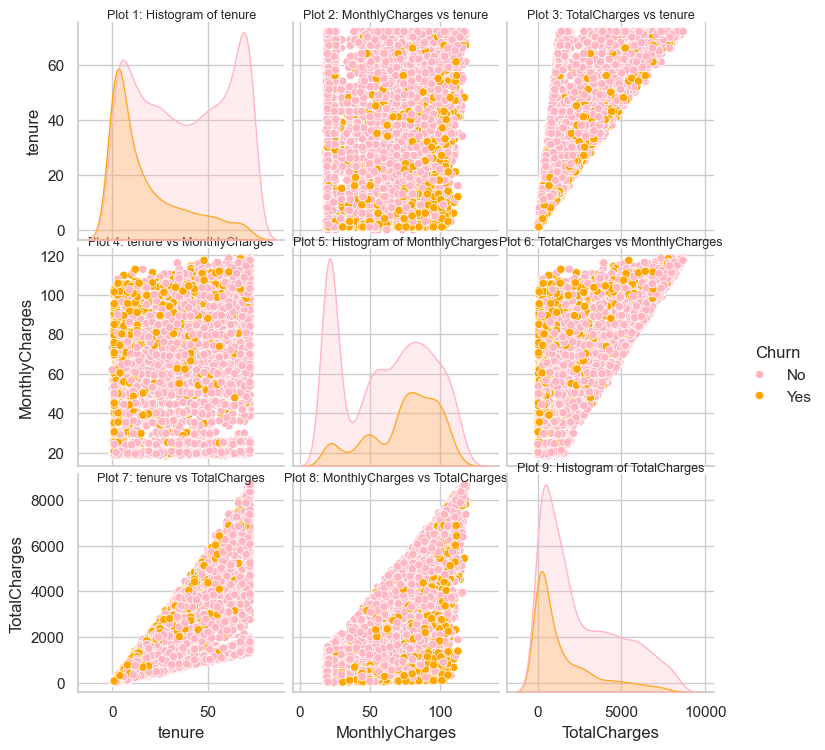

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables
vars_to_plot = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create pairplot
g = sns.pairplot(dataset[vars_to_plot + ['Churn']],
                 hue='Churn',
                 palette={'Yes': '#FFA500', 'No': '#FFB6C1'})


# Prepare custom titles for each subplot (row i, col j)
# For diagonal: histogram titles
# For off-diagonal: scatterplot titles with x vs y
subplot_titles = []

for i, y_var in enumerate(vars_to_plot):
    row_titles = []
    for j, x_var in enumerate(vars_to_plot):
        if i == j:
            title = f"Plot {i*len(vars_to_plot) + j + 1}: Histogram of {x_var}"
        else:
            title = f"Plot {i*len(vars_to_plot) + j + 1}: {x_var} vs {y_var}"
        row_titles.append(title)
    subplot_titles.append(row_titles)

# Add titles above each subplot
for i in range(len(vars_to_plot)):
    for j in range(len(vars_to_plot)):
        ax = g.axes[i, j]
        # Set the title with a bit of padding above the subplot
        ax.set_title(subplot_titles[i][j], fontsize=9, pad=-5)

plt.show()


##### Interpretation of the Pairplot

**Plot 1: Histogram of tenure**
- Observation: Churned customers are heavily concentrated at low tenure values.
- Interpretation: Tenure is strongly related to churn — early customers are much more likely to churn.
- Modeling suggestion: 
    - Keep tenure as a key feature.
    - Consider engineering a binary “new_customer” feature (e.g., tenure < 6 months) to capture early churn risk more explicitly.

**Plot 2: MonthlyCharges vs tenure**
- Observation: Churners with low tenure tend to have higher monthly charges.
- Interpretation: MonthlyCharges interacts with tenure in predicting churn; high charges early on increase churn risk.
- Modeling suggestion: Keep MonthlyCharges and consider creating interaction terms (e.g., MonthlyCharges × new_customer) to capture this relationship.

**Plot 3: TotalCharges vs tenure**
- Observation: TotalCharges correlates with tenure but churners have low total charges due to short tenure.
- Interpretation: TotalCharges alone partly reflects tenure and early churn.
- Modeling suggestion: Keep TotalCharges, but beware of multicollinearity with tenure; consider using regularization or combining with tenure into a feature like average charges per month (TotalCharges / tenure).

**Plot 4: tenure vs MonthlyCharges**
- Observation: Similar to Plot 2 — churners cluster in low tenure with high MonthlyCharges.
- Interpretation: Confirms interaction effect.
- Modeling suggestion: Same as Plot 2: keep MonthlyCharges and tenure, engineer interaction features.

**Plot 5: Histogram of MonthlyCharges**
- Observation: Churners skew towards higher monthly charges.
- Interpretation: MonthlyCharges is a predictive feature for churn.
- Modeling suggestion: Keep MonthlyCharges as-is; if distribution is skewed, consider transformation (e.g., log) or binning to capture non-linear effects.

**Plot 6: TotalCharges vs MonthlyCharges**
- Observation: Churners have low total charges despite similar MonthlyCharges, reflecting short tenure.
- Interpretation: Combining TotalCharges and MonthlyCharges may help identify early churn.
- Modeling suggestion: Engineer features like average monthly spend or charge rate consistency; keep both variables but watch for redundancy.

**Plot 7: tenure vs TotalCharges**
- Observation: Strong positive correlation, churners concentrated at low tenure and low total charges.
- Interpretation: Tenure and TotalCharges provide overlapping information.
- Modeling suggestion: Consider dimensionality reduction or feature engineering (e.g., ratio features) to reduce redundancy but keep both initially.

**Plot 8: MonthlyCharges vs TotalCharges**
- Observation: Similar to Plot 6; churners have lower total charges despite comparable monthly charges.
- Interpretation: Confirms that total accumulated charges reflect customer lifespan.
- Modeling suggestion: Same as Plot 6 — keep both, engineer combined features, check correlations.

**Plot 9: Histogram of TotalCharges**
- Observation: TotalCharges is right-skewed with many churners at low values.
- Interpretation: TotalCharges is predictive but skewed.
- Modeling suggestion: Consider log-transforming or binning TotalCharges to handle skewness and improve model performance.

##### Summary of the Pairplot

- Keep all three variables — tenure, MonthlyCharges, and TotalCharges — as they all carry important churn information.
- Engineer interaction and ratio features (e.g., tenure-based flags, average charges).
- Consider transformations (log, binning) to address skewness and non-linearity.
- Monitor multicollinearity between tenure and TotalCharges; use regularization or dimensionality reduction if needed.
- Avoid dropping these variables initially since they provide complementary predictive power for churn.

### 8. Segment Analysis
Group by Churn and compare:
Average MonthlyCharges
Contract types
Internet service
Tenure
📌 Try: groupby('Churn').mean() or .value_counts(normalize=True) for categories

In [71]:
# Define numerical columns
num_features = dataset.select_dtypes(include=['number']).columns.tolist()

# Define bins & labels per feature
bins_dict = {
    'tenure': [0, 12, 24, 48, 72],
    'MonthlyCharges': [0, 35, 70, 105, 140],  # Example bins for MonthlyCharges
    'TotalCharges': [0, 500, 1500, 3500, 6000]  # Example bins for TotalCharges
}

labels_dict = {
    'tenure': ['0-12', '13-24', '25-48', '49-72'],
    'MonthlyCharges': ['0-35', '36-70', '71-105', '106-140'],
    'TotalCharges': ['0-500', '501-1500', '1501-3500', '3501-6000']
}

# Loop over numerical features and create groups only if bins are defined for them
for feature in num_features:
    if feature in bins_dict:
        dataset[f'{feature}_group'] = pd.cut(
            dataset[feature],
            bins=bins_dict[feature],
            labels=labels_dict[feature],
            include_lowest=True
        )
        print(f"Churn rate by {feature}_group:")
        print(dataset.groupby(f'{feature}_group')['Churn'].value_counts(normalize=True).unstack())
        print("\n" + "="*50 + "\n")


Churn rate by tenure_group:
Churn               No       Yes
tenure_group                    
0-12          0.525618  0.474382
13-24         0.712891  0.287109
25-48         0.796110  0.203890
49-72         0.904868  0.095132


Churn rate by MonthlyCharges_group:
Churn                       No       Yes
MonthlyCharges_group                    
0-35                  0.891066  0.108934
36-70                 0.760580  0.239420
71-105                0.621860  0.378140
106-140               0.791506  0.208494


Churn rate by TotalCharges_group:
Churn                     No       Yes
TotalCharges_group                    
0-500               0.585500  0.414500
501-1500            0.751957  0.248043
1501-3500           0.763176  0.236824
3501-6000           0.840722  0.159278




/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_33060/611638923.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(dataset.groupby(f'{feature}_group')['Churn'].value_counts(normalize=True).unstack())
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_33060/611638923.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(dataset.groupby(f'{feature}_group')['Churn'].value_counts(normalize=True).unstack())
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_33060/611638923.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a futu

##### General Observations and Conclusions
1. Customers with tenure between 0 to 12 months exhibit the highest churn rate, indicating that newer customers are more likely to leave.

**This suggests:**


 - Newer customers tend to leave more often than those who have been with the company longer.

- This could mean customers aren’t fully satisfied or their expectations aren’t met early on.

- It might also point to onboarding or early service issues — if customers have a bad initial experience, they churn quickly.

- Alternatively, some customers might just be trying the service but don’t find it valuable enough to stay.~

**Implication:** The company should focus on improving the first-year experience to reduce early churn, such as better onboarding, clearer communication, or targeted offers.




2. Customers with monthly charges in the $71 to $105 range show the highest churn rates compared to other price groups.

**This suggests:**


- Price sensitivity: Customers paying in this mid-to-high price range might feel the service is not worth the cost, leading them to churn more frequently.

- Value perception: These customers might expect better service or more features for the higher monthly charges, and if their expectations aren’t met, they may decide to leave.

- Competitive alternatives: Customers in this price segment could be more tempted by competitors offering similar or better services at a lower price, causing higher churn.

- Billing surprise: If these charges are higher than they expected or variable, it might create dissatisfaction.

**Implication:** The company should investigate the needs and experiences of these customers and consider tailored retention strategies such as enhanced features, improved service quality, or targeted promotions to increase perceived value and loyalty.




3. Customers with lower total charges (0-500) tend to have a higher churn rate, and the churn rate decreases as total charges increase, suggesting that customers who have spent more overall are less likely to churn.

**This suggests:**


- Customers who have spent less total money with the company tend to leave more often.

- This could be because they are less invested or less engaged with the service.

- Higher total charges usually indicate longer tenure or more usage, so those customers might be more loyal or satisfied.

- Low total charges might also correspond to short tenure customers, who churn more frequently (which matches the first bullet point).

**Implication:** Encouraging customers to engage more or increasing their usage might help improve retention, as more invested customers are less likely to churn.


_Note: The full output can be viewed in the '01_eda_segment_analysis_for_numerical_variables.ipynb' file found in the 'outputs/01_eda_outputs' folder_